<a href="https://colab.research.google.com/github/EnterTheBeginning/Machine-Learning/blob/master/HW3_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fine-Tuning

Now there is a need to Unfreeze some layers in Conv Base network. 

Then Jointly train both layers and the parts that are added

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
import os
import zipfile

from keras.layers import Dense,Dropout,Activation,Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19
from keras import layers
from keras import optimizers


##Preprocessing

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
train_cat_fnames = os.listdir(train_cats_dir)
train_cat_fnames.sort()
train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
conv_base = VGG19(weights='imagenet',include_top=False,input_shape=(150,150,3))

--2019-04-16 20:00:51--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 2a00:1450:4013:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   151MB/s    in 0.4s    

2019-04-16 20:00:52 (151 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



##Freezing the Conv Base

In [0]:
conv_base.trainable = False
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
100/100 [==============================] - 23s 231ms/step - loss: 0.6188 - acc: 0.6595 - val_loss: 0.4950 - val_acc: 0.7810
Epoch 2/10
100/100 [==============================] - 18s 181ms/step - loss: 0.5300 - acc: 0.7460 - val_loss: 0.4219 - val_acc: 0.8290
Epoch 3/10
100/100 [==============================] - 18s 185ms/step - loss: 0.4760 - acc: 0.7955 - val_loss: 0.3733 - val_acc: 0.8420
Epoch 4/10
100/100 [==============================] - 18s 180ms/step - loss: 0.4411 - acc: 0.8125 - val_loss: 0.3483 - val_acc: 0.8540
Epoch 5/10
100/100 [==============================] - 18s 178ms/step - loss: 0.4347 - acc: 0.7965 - val_loss: 0.3294 - val_acc: 0.8670
Epoch 6/10
100/100 [==============================] - 18s 177ms/step - loss: 0.4088 - acc: 0.8135 - val_loss: 0.3165 - val_acc: 0.8690
Epoch 7/10
100/100 [==============================] - 18s 

##Unfreezing



Lets fine tune the last **four CNN** layers = all layers above needs to be frozen

In [0]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv2':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [9]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 21s 205ms/step - loss: 0.3640 - acc: 0.8375 - val_loss: 0.2667 - val_acc: 0.8780
Epoch 2/30
100/100 [==============================] - 19s 195ms/step - loss: 0.3146 - acc: 0.8680 - val_loss: 0.2570 - val_acc: 0.9030
Epoch 3/30
100/100 [==============================] - 18s 183ms/step - loss: 0.2674 - acc: 0.8885 - val_loss: 0.2500 - val_acc: 0.8970
Epoch 4/30
100/100 [==============================] - 18s 183ms/step - loss: 0.2756 - acc: 0.8785 - val_loss: 0.2376 - val_acc: 0.9120
Epoch 5/30
100/100 [==============================] - 18s 184ms/step - loss: 0.2459 - acc: 0.8980 - val_loss: 0.2010 - val_acc: 0.9180
Epoch 6/30
100/100 [==============================] - 19s 188ms/step - loss: 0.2343 - acc: 0.9055 - val_loss: 0.1998 - val_acc: 0.9250
Epoch 7/30
100/100 [==============================] - 19s 193ms/step - loss: 0.2177 - acc: 0.9130 - val_loss: 0.2040 - val_acc: 0.9310
Epoch 8/30
100/100 [==============================] - 1

In [10]:
score= model.evaluate_generator(validation_generator,steps = 50)
print("Loss :",score[0])
print("Accuracy: ",score[1])


Loss : 0.26852526399539783
Accuracy:  0.9329999923706055


Accuracy of 94%.

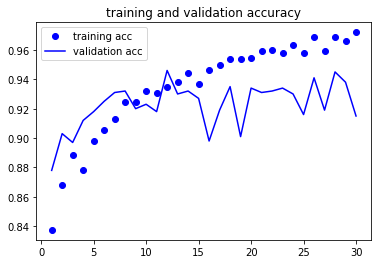

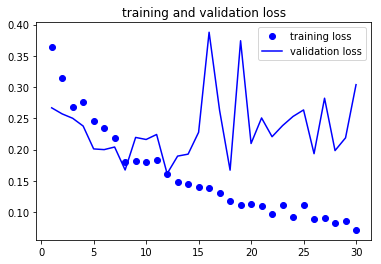

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()
